In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

https://www.ihsenergy.ca/support/documentation_ca/WellTest/content/html_files/reference_materials/calculations_correlations/oil_correlations.htm#Vasquez

<h3><u>Input Parameters:</h3></u>

<strong>Y<sub>o</sub>: Oil Specific Gravity</strong> <br>
Degrees API<br>

<strong>Y<sub>g</sub>: Gas Specific Gravity</strong> <br>
Decimal<br>

<strong>R<sub>si</sub>: Initial Solution Gas-Oil Ratio</strong> <br>
SCF/STB<br>

<strong>T: Temperature</strong> <br>
Degrees Fahrenheit<br>

<h3><u>Outputs:</h3></u>

<strong>B<sub>o</sub>: Oil Formation Volume Factor</strong> <br>
STB/RB<br>

<strong>S<sub>o</sub>: Oil Saturation</strong> <br>
decimal<br>

<strong>c<sub>o</sub>: Oil Compressibility</strong><br>
1/psi<br>

<strong>B<sub>oi</sub>: Oil Formation Volume Factor, Initial</strong><br>
STB/RB<br>

<strong>B<sub>g</sub>: Formation Volume Factor, Gas</strong><br>

<strong>R<sub>s</sub>: Solution Gas-Oil Ratio</strong><br>
SCF/B<br>

In [2]:
class vb_oil:
    '''
    ...
    An instance of the vb_oil class represents a liquid that
    behaves as described by the Vasquez-Beggs Oil Correlation.
    
    ...
    Required Arguments:
    --------
    Yo :    Oil Specific Gravity (degrees API)
    Yg :    Gas Specific Gravity (decimal ratio)
    Rsi:    Initial Solution Gas-Oil Ratio (SCF/STB)
    T  :    Temperature (degrees Fahrenheit)
    
    ...
    Methods
    --------
    get_Rs(P) : returns the solution gas-oil ratio of the fluid at a
                given pressure
    get_Pb()  : returns the bubble-point pressure of the fluid based
                on fluid parameters entered as arguments in the class
    plot_Rs() : returns a chart showing solution gas-oil ratio behavior
                from pressure = 0 PSIG to pressure = 1.3 * Pb
    get_Bo(P) : returns the oil formation volume factor in Stocktank Barrels 
                per Reservoir Barrel (STB/RB) at a given pressure
    plot_Bo() : returns a chart showing oil formation volume factor behavior
                from pressure = 0 PSIG to pressure = 1.3 * Pb
    summary() : returns a Pandas dataframe summarizing key fluid properties
    
    ...
    
    '''

    def __init__(self, Yo, Yg, Rsi, T):
        self.Yo = Yo
        self.Yg = Yg
        self.Rsi = Rsi
        self.T = T
        
        self.Pb = self.get_Pb()
        
        self.co = .000006 # for now...need to add a co function later

        
    def get_Rs(self, P):

        if self.Yo > 30:
            c1 = .0178
            c2 = 1.187
            c3 = 23.931
        else:
            c1 = .0362
            c2 = 1.0937
            c3 = 25.724    

        if P > self.Pb:
            Rs = self.Rsi
        else:
            Rs = c1 * self.Yg * P**c2 * numpy.exp(c3 * (self.Yo / (self.T + 460)))
        return Rs
    
    
    def get_Pb(self):

        if self.Yo > 30:
            c1 = .0178
            c2 = 1.187
            c3 = 23.931
        else:
            c1 = .0362
            c2 = 1.0937
            c3 = 25.724
        
        Pb = (self.Rsi / (c1 * self.Yg * numpy.exp(c3 * (self.Yo / (self.T + 460))))) ** (1 / c2)
        return Pb


    def plot_Rs(self):
        xs = numpy.linspace(0, self.Pb, 1000).tolist()
        ys = []
        
        for i in xs:
            ys.append(self.get_Rs(i))

        
        x2, x3 = self.Pb, 1.5 * self.Pb
        y2, y3 = self.get_Rs(x2), self.get_Rs(x3)
        
        xs.extend([x2, x3])
        ys.extend([y2, y3])
        
        plt.figure(figsize=(4,3))
        plt.plot(xs, ys)
        plt.ylim(None, 1.2 * y3)
        plt.xlabel('Pressure (PSI)')
        plt.ylabel('Rs');
        

    def get_Bo(self, P):
        
        if self.Yo > 30:
            c1 = 4.67e-4
            c2 = 1.1e-5
            c3 = 1.377e-9
        else:
            c1 = 4.677e-4
            c2 = 1.751e-5
            c3 = -1.811e-8

        Bob = 1 + c1 * self.get_Rs(self.Pb) + c2 * (self.T - 60) * (
            self.Yo / self.Yg) + c3 * self.get_Rs(self.Pb) * (self.T - 60) * (self.Yo / self.Yg)
        
        if P < self.Pb:
            Bo = 1 + c1 * self.get_Rs(P) + c2 * (self.T - 60) * (
                self.Yo / self.Yg) + c3 * self.get_Rs(P) * (self.T - 60) * (self.Yo / self.Yg)
        else:
            Bo = Bob * np.exp(self.co * (self.Pb - P))
        
        return Bo

    
    def plot_Bo(self):
        xs = []
        ys = []
        psubi = 0
        n = 1000
        for i in range(n):
            xs.append(psubi)
            ys.append(self.get_Bo(psubi))
            psubi = psubi + self.Pb * 1.5 / n
        plt.figure(figsize=(4,3))
        plt.plot(xs, ys);
        plt.xlabel('Pressure (PSI)')
        plt.ylabel('Oil FVF')
        plt.ylim(1,2)
    
    def summary(self):
        return pd.DataFrame({'Value': self.__dict__.values()}, index=self.__dict__.keys())

#### Create an instance of the vb_oil class:

In [3]:
oil = vb_oil(42, .75, 800, 160)

NameError: name 'numpy' is not defined

#### Test the vb_oil methods using the created instance:

In [66]:
[i for i in dir(oil) if not i.startswith('__')]

['Pb',
 'Rsi',
 'T',
 'Yg',
 'Yo',
 'co',
 'get_Bo',
 'get_Pb',
 'get_Rs',
 'plot_Bo',
 'plot_Rs',
 'summary']

In [67]:
oil.summary()

,Value
Yo,42.000000
Yg,0.750000
Rsi,800.000000
T,160.000000
Pb,2702.783305
co,0.000006


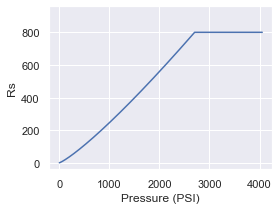

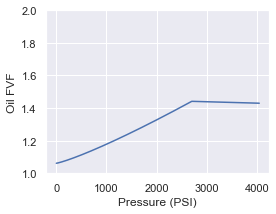

In [68]:
oil.plot_Rs()
oil.plot_Bo()